In [55]:
import matplotlib.pyplot as plt
from splane import *
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap
import sympy as sp
import math 

Puedo ver en el gráfico que para w=3 tenemos el cero de transmisión, siendo la transferencia de un Notch pasabajos:

$$T(s) = \frac{s^2 + {w_z}^2}{s^2+s\frac{1}{q}+1}\cdot K$$

Y viendo que la ganancia es nula, K = 1/9 y ${w_z}^2$ = 3 obtengo:

$$T(s) = \frac{1}{3} \cdot \frac{s^2 + 9}{ \left( s^2+ s \frac{1}{q} +1 \right)\cdot(s+3)}$$


In [184]:
all_sys = []
filter_names = []

# No nos da información del Q, así que escogí que Q = 1/sqrt(2) = 
w, s, e, q = sp.symbols('w s e q') # Creamos las variables que usaremos en nuestras funciones.
H, f, Dem, p, np, result = sp.symbols('H, f, Dem p np result', cls=sp.Function) # Creamos ls funciones que usaremos.

H = (s**2 + 9) / sp.expand((s**2 + s * 1/sp.sqrt(2) + 1)*(s+3))

display(Math('H(s) = \\frac{1}{3} \\cdot'+ sp.latex(H)))

<IPython.core.display.Math object>

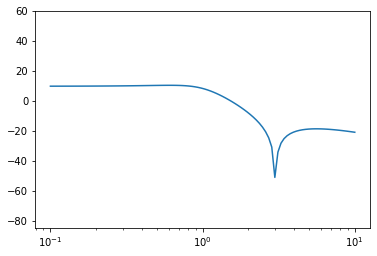

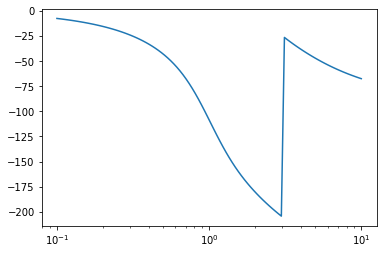

In [190]:
num=[1,0,9]
dem=[1,4,4,3]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-85,60])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

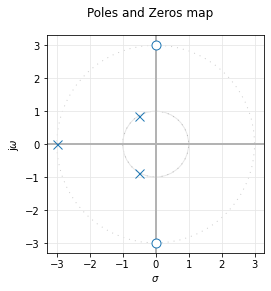

In [191]:


pzmap(sys) # Diagrama de polos y ceros. Función con efectos colaterales.

Aplico el núcleo de tranasformación de pasabajos a pasaltos

In [192]:
H2 = 1/3 * sp.simplify(H.subs({s:1/s}))
H2

0.666666666666667*s*(9*s**2 + 1)/(6*s**3 + s**2*(2 + 3*sqrt(2)) + s*(sqrt(2) + 6) + 2)

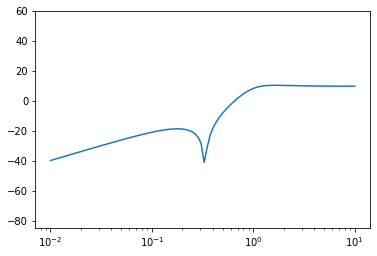

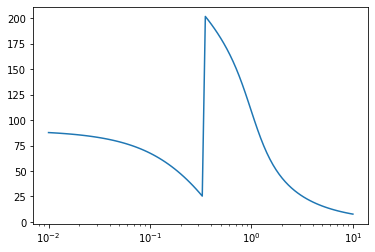

In [193]:
num=[9,0,1,0]
dem=[3,4,4,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-85,60])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


Para implementarlo separamos:

In [208]:
n,d = sp.fraction(H2)
dem = sp.poly(d,s)

display(Math(sp.latex(dem)))
raices = sp.roots(dem, multiple=True)

display(Math(sp.latex(raices)))

poly1 = sp.poly( (s - raices[1]) * (s - raices[2]),s )
poly2 = sp.poly( (s - raices[0]),s ) 

display(Math(sp.latex(poly1)))

w_0 = poly1.coeff_monomial(s)
w_1 = poly2.coeff_monomial(s)

cutePoly1 = sp.N(w_0*s/poly1,3)
cutePoly2 = sp.N(w_1*s/poly2,3)

display(Math("H(s) = K \cdot" + sp.latex(cutePoly1) + sp.latex(cutePoly2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

K vale $\frac{1}{0.717}$ para que la ganancia de 0.